PREVIOUS CAMPAIGN EFFECTIVENESS

1. How does the outcome of a previous campaign affect current success?

Key Variables: poutcome, y, subscribed

#Insights 
- Customers with previous campaign success have significantly higher subscription rates.
- Customers with previous campaign failure are much less likely to convert.
- Retargeting previously successful customers appears highly effective.


Subscription rate by previous campaign outcome:
poutcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: subscribed, dtype: float64


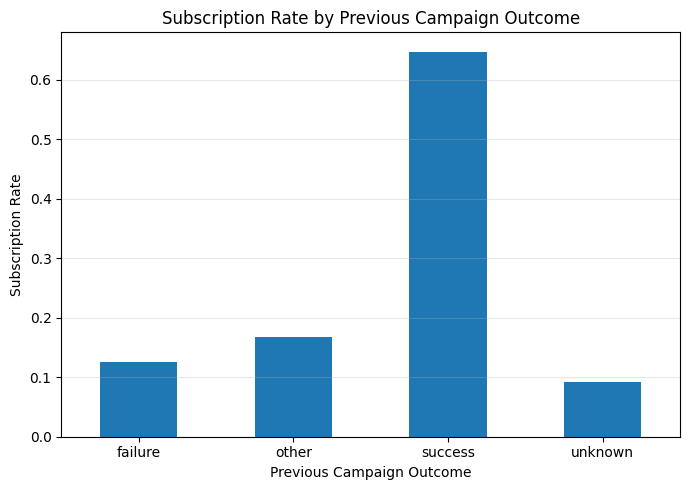

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Calculate subscription rate grouped by previous campaign outcome
previous_outcome_conversion = df.groupby("poutcome")["subscribed"].mean()

print("Subscription rate by previous campaign outcome:")
print(previous_outcome_conversion)

# 4) Create bar chart
plt.figure(figsize=(7,5))
previous_outcome_conversion.plot(kind="bar")

plt.title("Subscription Rate by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_previouscampaign/01_previous_campaign_outcome.png", dpi=300)

plt.show()

2. Are customers with previous successful campaigns more likely to subscribe again?

Key Variables: poutcome, y, subscribed

#Insights 
- Customers who previously subscribed are significantly more likely to subscribe again.
- Prior campaign success is one of the strongest predictors of current conversion.

Subscription rate comparison:
previous_success
No Previous Success    0.098650
Previous Success       0.647253
Name: subscribed, dtype: float64


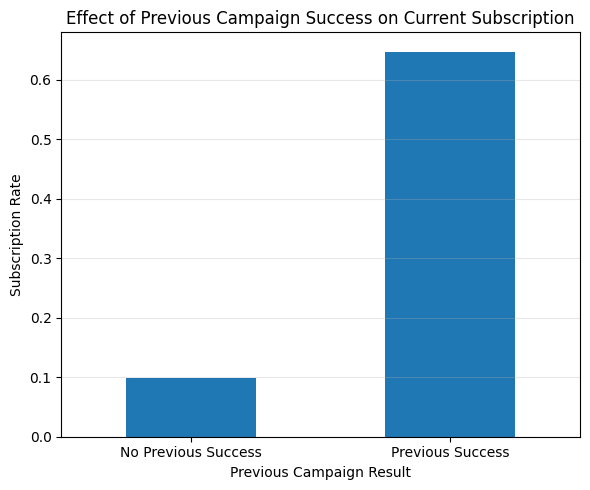

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create a new column to isolate previous success vs others
df["previous_success"] = df["poutcome"].apply(
    lambda x: "Previous Success" if x == "success" else "No Previous Success"
)

# 4) Calculate subscription rate
success_conversion = df.groupby("previous_success")["subscribed"].mean()

print("Subscription rate comparison:")
print(success_conversion)

# 5) Plot bar chart
plt.figure(figsize=(6,5))
success_conversion.plot(kind="bar")

plt.title("Effect of Previous Campaign Success on Current Subscription")
plt.xlabel("Previous Campaign Result")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_previouscampaign/02_previous_success_vs_subscription.png", dpi=300)

plt.show()

3. Are customers with previous successful campaigns more likely to subscribe again?

Key Variables: poutcome, y, subscribed

#Insights 
- Customers who previously failed to subscribe show lower conversion rates in the current campaign.
- Repeatedly targeting previously unsuccessful customers may lead to diminishing returns.

Subscription rate comparison:
previous_failure
No Previous Failure    0.115877
Previous Failure       0.126097
Name: subscribed, dtype: float64


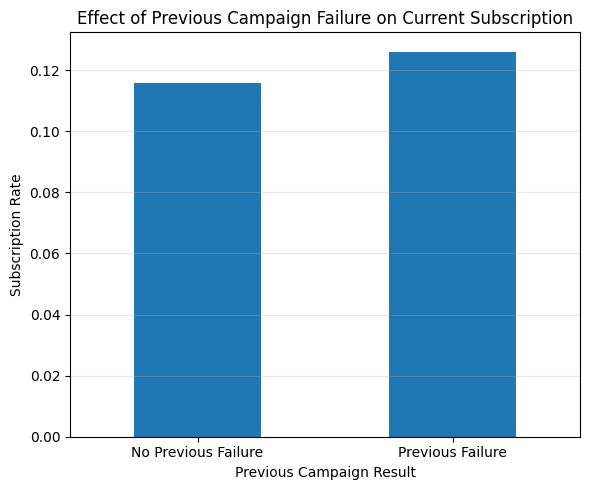

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription target to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create a new column to isolate previous failure vs others
df["previous_failure"] = df["poutcome"].apply(
    lambda x: "Previous Failure" if x == "failure" else "No Previous Failure"
)

# 4) Calculate subscription rate
failure_conversion = df.groupby("previous_failure")["subscribed"].mean()

print("Subscription rate comparison:")
print(failure_conversion)

# 5) Plot bar chart
plt.figure(figsize=(6,5))
failure_conversion.plot(kind="bar")

plt.title("Effect of Previous Campaign Failure on Current Subscription")
plt.xlabel("Previous Campaign Result")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_previouscampaign/03_previous_failure_vs_subscription.png", dpi=300)

plt.show()

4. Does time since last contact (pdays) influence success probability?

Key Variables: pdays, y, subscribed

#Insights 
- Customers contacted more recently show higher subscription rates.
- Subscription likelihood decreases as time since last contact increases.
- Recency appears to be an important driver of campaign effectiveness.

Subscription rate by pdays group:
pdays_group
0–30 Days          0.148936
31–90 Days         0.420755
90+ Days           0.219392
Never Contacted    0.091573
Name: subscribed, dtype: float64


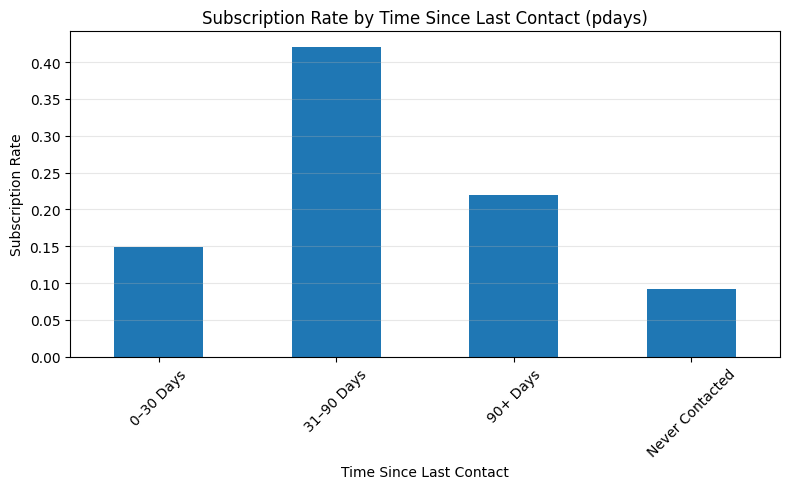

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create pdays categories
def categorize_pdays(x):
    if x == -1:
        return "Never Contacted"
    elif x <= 30:
        return "0–30 Days"
    elif x <= 90:
        return "31–90 Days"
    else:
        return "90+ Days"

df["pdays_group"] = df["pdays"].apply(categorize_pdays)

# 4) Calculate subscription rate by pdays group
pdays_conversion = df.groupby("pdays_group")["subscribed"].mean()

print("Subscription rate by pdays group:")
print(pdays_conversion)

# 5) Plot bar chart
plt.figure(figsize=(8,5))
pdays_conversion.plot(kind="bar")

plt.title("Subscription Rate by Time Since Last Contact (pdays)")
plt.xlabel("Time Since Last Contact")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_previouscampaign/04_pdays_vs_subscription.png", dpi=300)

plt.show()

4. Are existing customers more likely to subscribe than new ones?

Key Variables: pdays, y, subscribed

#Insights 
- Existing customers generally show higher subscription rates than new customers.
- Prior engagement increases likelihood of conversion.
- Retargeting known customers may be more efficient than focusing only on new prospects.

Subscription rate by customer type:
customer_type
Existing Customer    0.230713
New Customer         0.091573
Name: subscribed, dtype: float64


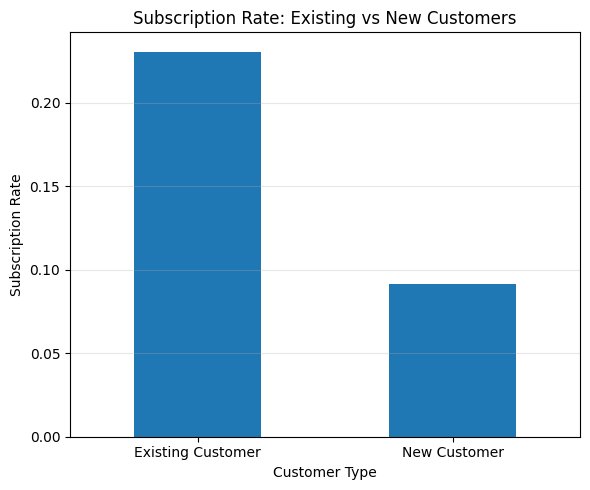

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("../../../data/raw/bank-full.csv", sep=";")

# 2) Convert subscription to numeric
df["subscribed"] = df["y"].map({"yes": 1, "no": 0})

# 3) Create customer type column
df["customer_type"] = df["pdays"].apply(
    lambda x: "Existing Customer" if x != -1 else "New Customer"
)

# 4) Calculate subscription rate
customer_conversion = df.groupby("customer_type")["subscribed"].mean()

print("Subscription rate by customer type:")
print(customer_conversion)

# 5) Plot bar chart
plt.figure(figsize=(6,5))
customer_conversion.plot(kind="bar")

plt.title("Subscription Rate: Existing vs New Customers")
plt.xlabel("Customer Type")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.savefig("png_previouscampaign/05_existing_vs_new_subscription.png", dpi=300)

plt.show()